# Fake_Account_ Detection_Project


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
import joblib
import warnings
warnings.filterwarnings('ignore')

**Load the Data**

In [52]:
train_data=pd.read_csv(r"C:\Users\NAVEENKUMAR\Documents\Fake_Account_Project_Data set\train.csv")
train_data
test_data=pd.read_csv(r"C:\Users\NAVEENKUMAR\Documents\Fake_Account_Project_Data set\test.csv")
test_data

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0
...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.29,1,0.00,0,0,0,0,13,114,811,1
116,1,0.40,1,0.00,0,0,0,0,4,150,164,1
117,1,0.00,2,0.00,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.00,0,0,0,0,1,219,1695,1


In [53]:
train_data= pd.DataFrame(train_data)

In [54]:
test_data= pd.DataFrame(test_data)

In [55]:
test_data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


**Data Exploration Analysis**

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


**Check Each And Every Columns Unique Values**

In [59]:
train_data['profile pic'].unique()

array([1, 0], dtype=int64)

In [60]:
train_data['profile pic'].value_counts()

profile pic
1    404
0    172
Name: count, dtype: int64

In [61]:
train_data['fullname words'].unique()

array([ 0,  2,  1,  4,  3,  6, 12,  5, 10], dtype=int64)

In [62]:
train_data['fullname words'].value_counts()

fullname words
1     283
2     187
0      57
3      34
4       7
5       4
6       2
12      1
10      1
Name: count, dtype: int64

In [63]:
train_data['nums/length fullname'].unique()

array([0.  , 0.12, 0.1 , 0.08, 0.24, 0.25, 0.33, 0.14, 0.22, 0.43, 0.4 ,
       0.36, 0.29, 0.11, 0.31, 0.89, 0.2 , 0.38, 0.27, 0.44, 1.  , 0.5 ,
       0.18, 0.57, 0.46])

In [64]:
train_data['nums/length fullname'].value_counts()

nums/length fullname
0.00    518
0.33     11
0.40      7
0.25      4
0.50      3
0.31      3
1.00      3
0.22      3
0.24      3
0.43      2
0.36      2
0.12      2
0.18      2
0.44      2
0.38      1
0.57      1
0.27      1
0.29      1
0.20      1
0.89      1
0.11      1
0.14      1
0.08      1
0.10      1
0.46      1
Name: count, dtype: int64

In [65]:
train_data['name==username'].unique()

array([0, 1], dtype=int64)

In [66]:
train_data['name==username'].value_counts()


name==username
0    556
1     20
Name: count, dtype: int64

In [67]:
train_data['description length'].unique()

array([ 53,  44,   0,  82,  81,  50,  71,  40,  54, 103,  98,  46,  48,
        63, 106,  35,  30,  27, 109, 132, 126, 122, 138,  56,   9, 134,
         2,  23,  93,   4,   1,  91,  57, 108,  12,   3,  39,  68, 129,
        64,  42,  70,  74,   8,  28,  18,  36,  11,  29,  24,  21,  34,
        59,  15,  16,  73,  26,  55, 140, 113,  38,  89, 123,  33,   5,
       150, 149, 148,  19, 133,  43,  37,  87,  95, 117,  58,  62, 137,
        14, 131,  10,  72,  51,  13, 105,  67,  20,  86,  96,  17,  61,
       112, 101,  32,  80, 146,   6,  49, 120,  25, 139,  31,   7,  22],
      dtype=int64)

In [68]:
train_data['description length'].value_counts()

description length
0      326
35       8
2        7
23       6
50       6
      ... 
29       1
131      1
56       1
72       1
14       1
Name: count, Length: 104, dtype: int64

In [69]:
train_data['external URL'].unique()

array([0, 1], dtype=int64)

In [70]:
train_data['external URL'].value_counts()

external URL
0    509
1     67
Name: count, dtype: int64

In [71]:
train_data['private'].unique()

array([0, 1], dtype=int64)

In [72]:
train_data['private'].value_counts()

private
0    356
1    220
Name: count, dtype: int64

In [73]:
train_data['#posts'].unique()

array([  32,  286,   13,  679,    6,  344,   16,   33,   72,  213,  648,
         76,  298,  117,  487,  254,   59, 1570,  378,  526,  228,   35,
        281,  285,  148,   57,   17,  511,  230,   15,  980,   53,  111,
        719, 1164,  497,   18,   50,   74,    8, 7389,  420,  433,  156,
       4494,  751,    4,   27,   91,  262,  274,  271,  713,  200,   12,
         26,   75,   94,   63,   69,   19,  100,  661,  149,   22,  400,
        122,   77,    5,    3,  106,   14,  172,   38,  227,  221,  580,
         40,  101,  157,  197,   61,  698,   49,   85,   58,  232,   20,
         98,  559,  189,  388,   28,  775,  205,  209,  334,    9,  416,
          1,  711,  114,  107,    7,   21,   65,   10,  137,  571,   24,
        328,  161,  280,   92,   31,    0,   25,  921, 1020,  301,  158,
         43,   60,  220, 1159,  396,    2,  131,   36,   11,  252,   83,
        126,  663,   64,  664,  130,  917,  142,  165,   80,   81,  373,
         56,   93,  192,  145,  135,  222,  119,  2

In [74]:
train_data['#followers'].unique()

array([    1000,     2740,      159,      414,      151,   669987,
            122,     1078,     1824,    12945,     9884,     1188,
            945,    12033,     1962,    50374,     7007,     1128,
          34670,     2338,     3516,     1809,      427,      759,
       15338538,      109,      536,   121354,     2284,      186,
            687,      966,      177,      744,   542073,  5315651,
            267,      691,      120,      105,   890969,   361853,
           3678,    92192, 12397719,   380510,      132,      162,
            369,     1476,     1798,     2118,      812,     7217,
            313,       64,     1759,      404,     1843,   320377,
            108,      384,       60,      802,    51145,     1582,
            223,    18842,    10240,      539,      399,      581,
            166,      417,      266,       33,      494,      178,
            470,      807,    17303,     1439,    91446,      824,
            741,     1267,     4594,     1135,     1926,     1

In [75]:
train_data['#follows'].unique()

array([ 955,  533,   98,  651,  126,  150,  177,   76, 2713,  813, 1173,
        365,  583,  248, 2701,  900,  289,  694, 1878,  776,  999,  416,
        470,  956,   61,  179,  665,  176,  130,  174, 1517,  952,  170,
        967,  674, 2703,  328,  680,  112,   11, 1359,   16,    8,    0,
        183,  208,  546,  666,  461, 1109,  432,  761,  376,  261,  643,
        283,  598,  228,   97,  447,  100,  151,  528, 1882,  266,  744,
       1255,  639,  452,  568,  163,  362,  324,   37,  998,  245,  288,
        675,  256,  395,  360,  629,  526,  489, 1440,  899, 1713, 1410,
       1925,  748,  469, 1074,  935,  599,  418,  438,  413,   55,  222,
         20,  173,  591,  638,  589,  390,   75, 1155, 1854,  164,  333,
       4659, 1093, 2047,  132,  689,  178, 1142,  209,  424,   80,  719,
       7500,  703, 3296,  270,   65,  610, 7202, 1039,  524,  138,  806,
        503, 1208,  802,  111,  475, 1061,  305,  375,   72,  371,  633,
       1016, 1065, 7399, 1216, 2928,  635,  417,  1

In [76]:
train_data['fake'].unique()

array([0, 1], dtype=int64)

In [77]:
train_data['fake'].value_counts()

fake
0    288
1    288
Name: count, dtype: int64

In [78]:
train_data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [79]:
train_data.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [80]:
train_data=train_data.drop_duplicates()

In [81]:
train_data.duplicated().sum()

0

In [82]:
train_data.skew()

profile pic             -0.876976
nums/length username     1.242763
fullname words           3.322937
nums/length fullname     4.427969
name==username           5.086378
description length       1.867761
external URL             2.393583
private                  0.481425
#posts                  12.968996
#followers              13.655042
#follows                 4.718818
fake                     0.000000
dtype: float64

**To Defind Continus value and discriate value**

In [84]:
countinus_value = train_data[["nums/length username","description length","#posts","#followers","#follows"]]

**Visualisation**

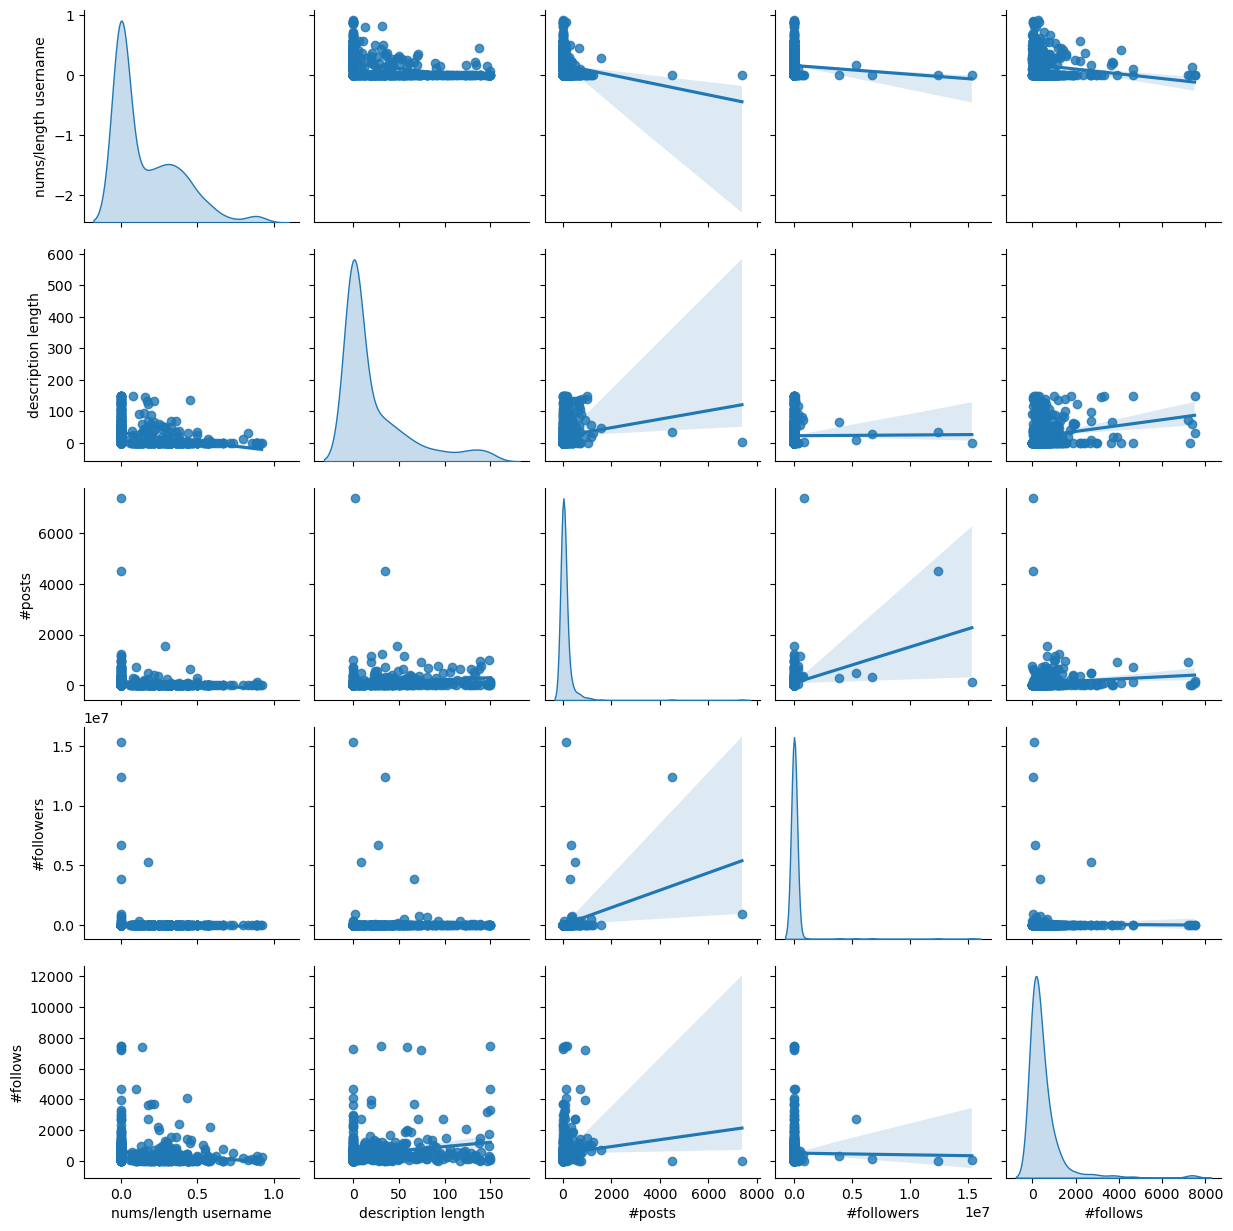

In [86]:
sns.pairplot(countinus_value, palette='coolwarm', kind='reg', diag_kind='kde')

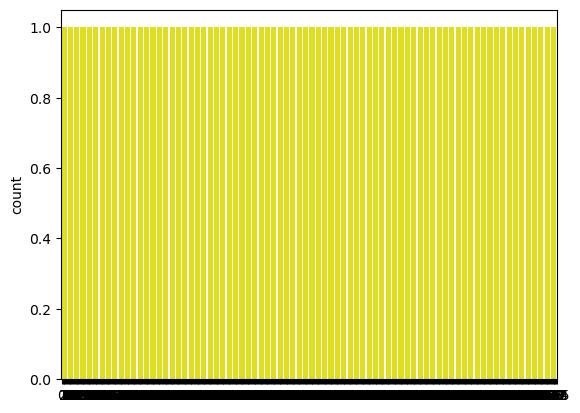

In [87]:
sns.countplot(train_data['private'],color='yellow')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

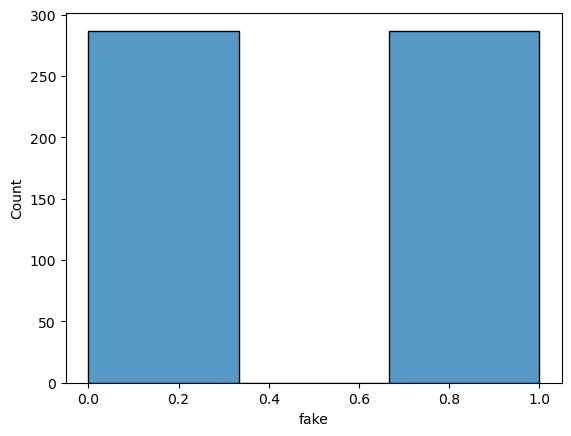

In [88]:
sns.histplot(train_data['fake'],bins=3,palette = "PuBu")
plt.show

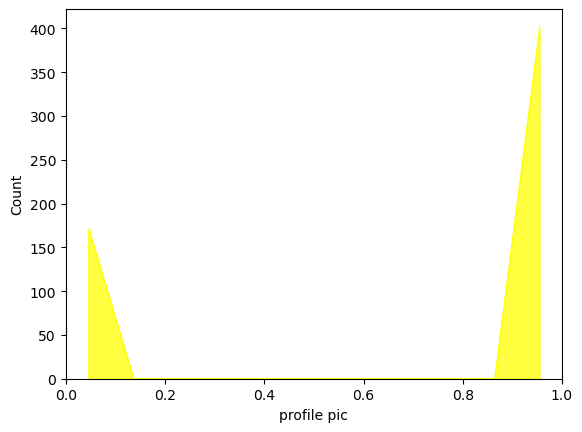

In [89]:
sns.histplot(train_data["profile pic"],color='yellow',palette='dict',element="poly",)
plt.show()

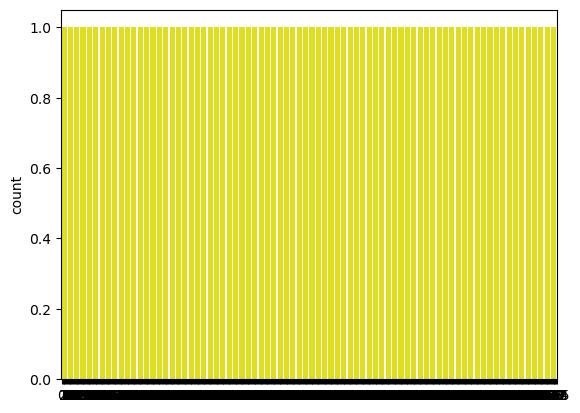

In [90]:
sns.countplot(train_data['profile pic'],color='yellow')
plt.show()

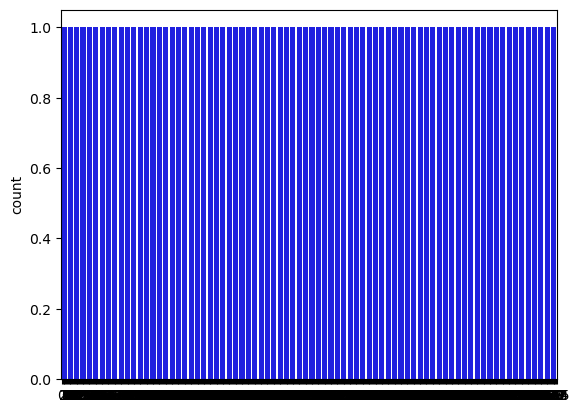

In [91]:
sns.countplot(train_data['fake'],color='blue')
plt.show()

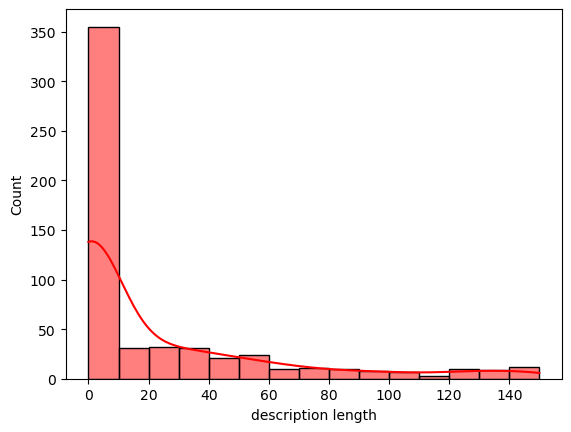

In [92]:
sns.histplot(train_data['description length'], bins=15,color='red',kde=True)
plt.show()

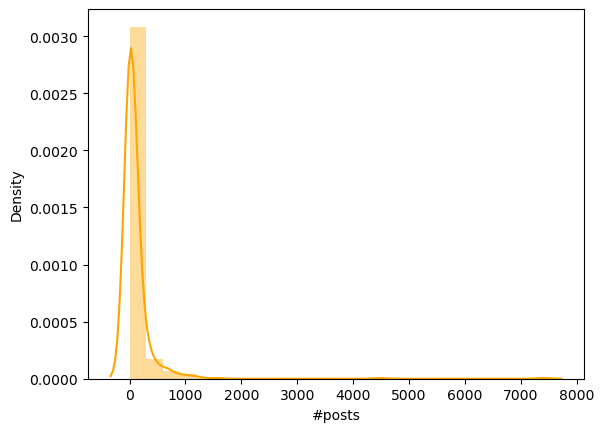

In [93]:
sns.distplot(train_data['#posts'], bins=25,color='orange',kde=True)
plt.show()

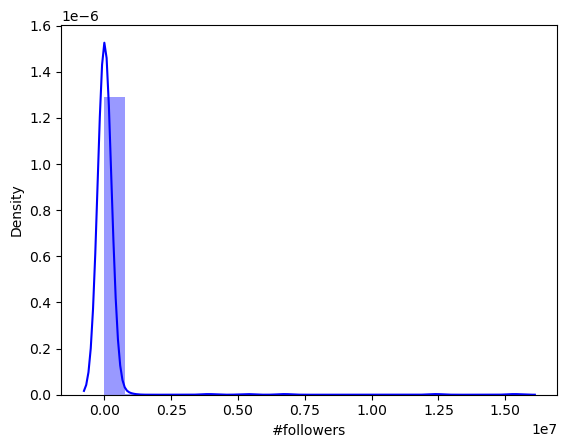

In [94]:
sns.distplot(train_data['#followers'], bins=20,color='blue',kde=True)
plt.show()

<Axes: >

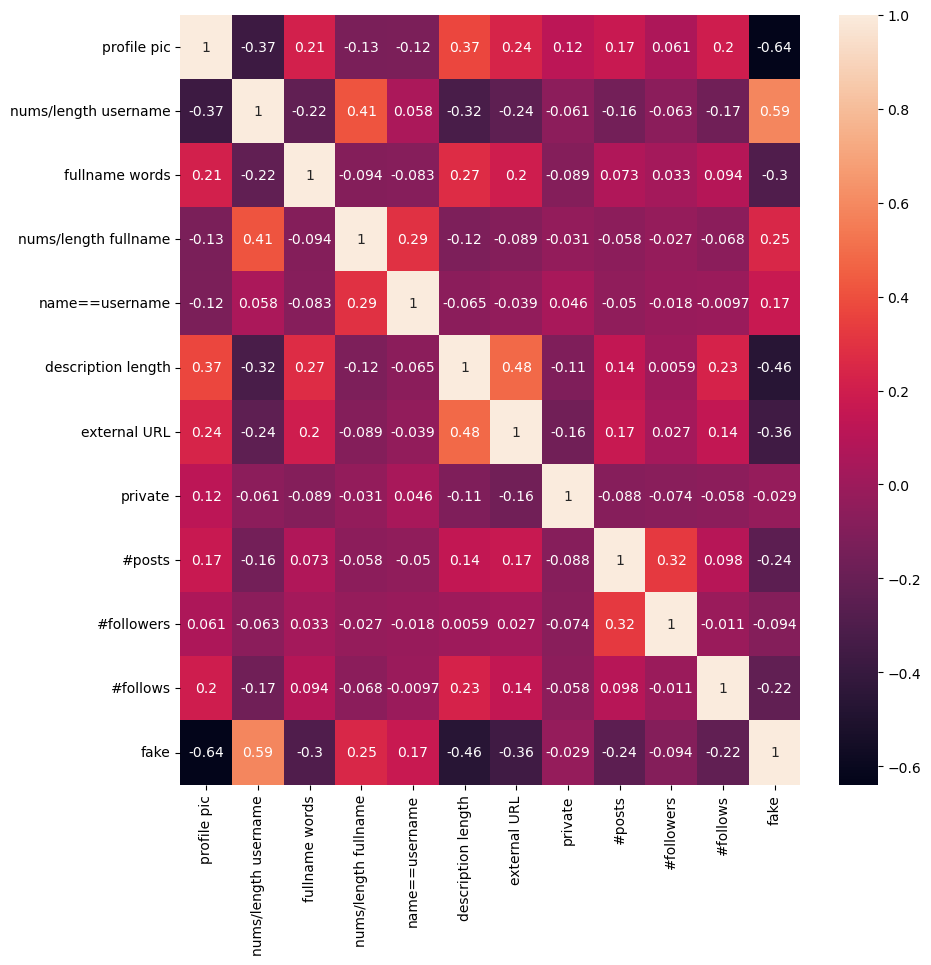

In [95]:
#Correlation heatmap
plt.figure(figsize=(10,10))
cm = train_data.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

**Test Data Analaysis**

In [97]:
test_data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


**Data Exploration Analysis**

In [99]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


**Check Each And Every Columns Unique Values**

In [101]:
test_data['profile pic'].value_counts()

profile pic
1    91
0    29
Name: count, dtype: int64

In [102]:
test_data['fullname words'].value_counts()

fullname words
1    64
2    40
0     7
3     4
5     2
4     1
9     1
7     1
Name: count, dtype: int64

In [103]:
test_data['name==username'].value_counts()

name==username
0    115
1      5
Name: count, dtype: int64

In [104]:
test_data['external URL'].value_counts()

external URL
0    108
1     12
Name: count, dtype: int64

In [105]:
test_data['private'].value_counts()

private
0    83
1    37
Name: count, dtype: int64

In [106]:
test_data.groupby('private')['#posts'].sum()

private
0    6326
1    3618
Name: #posts, dtype: int64

In [107]:
test_data.groupby('private')['#followers'].sum()

private
0    5918094
1      33272
Name: #followers, dtype: int64

In [108]:
test_data.groupby('private')['#follows'].sum()

private
0    69231
1    24281
Name: #follows, dtype: int64

In [109]:
test_data['fake'].value_counts()

fake
0    60
1    60
Name: count, dtype: int64

In [110]:
test_data.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [111]:
test_data.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [112]:
test_data=test_data.drop_duplicates()

In [113]:
train_data.duplicated().sum()

0

In [114]:
train_data.skew()

profile pic             -0.876976
nums/length username     1.242763
fullname words           3.322937
nums/length fullname     4.427969
name==username           5.086378
description length       1.867761
external URL             2.393583
private                  0.481425
#posts                  12.968996
#followers              13.655042
#follows                 4.718818
fake                     0.000000
dtype: float64

In [115]:
countinus_test_value = test_data[["nums/length username","description length","#posts","#followers","#follows"]]

**Visualisation**

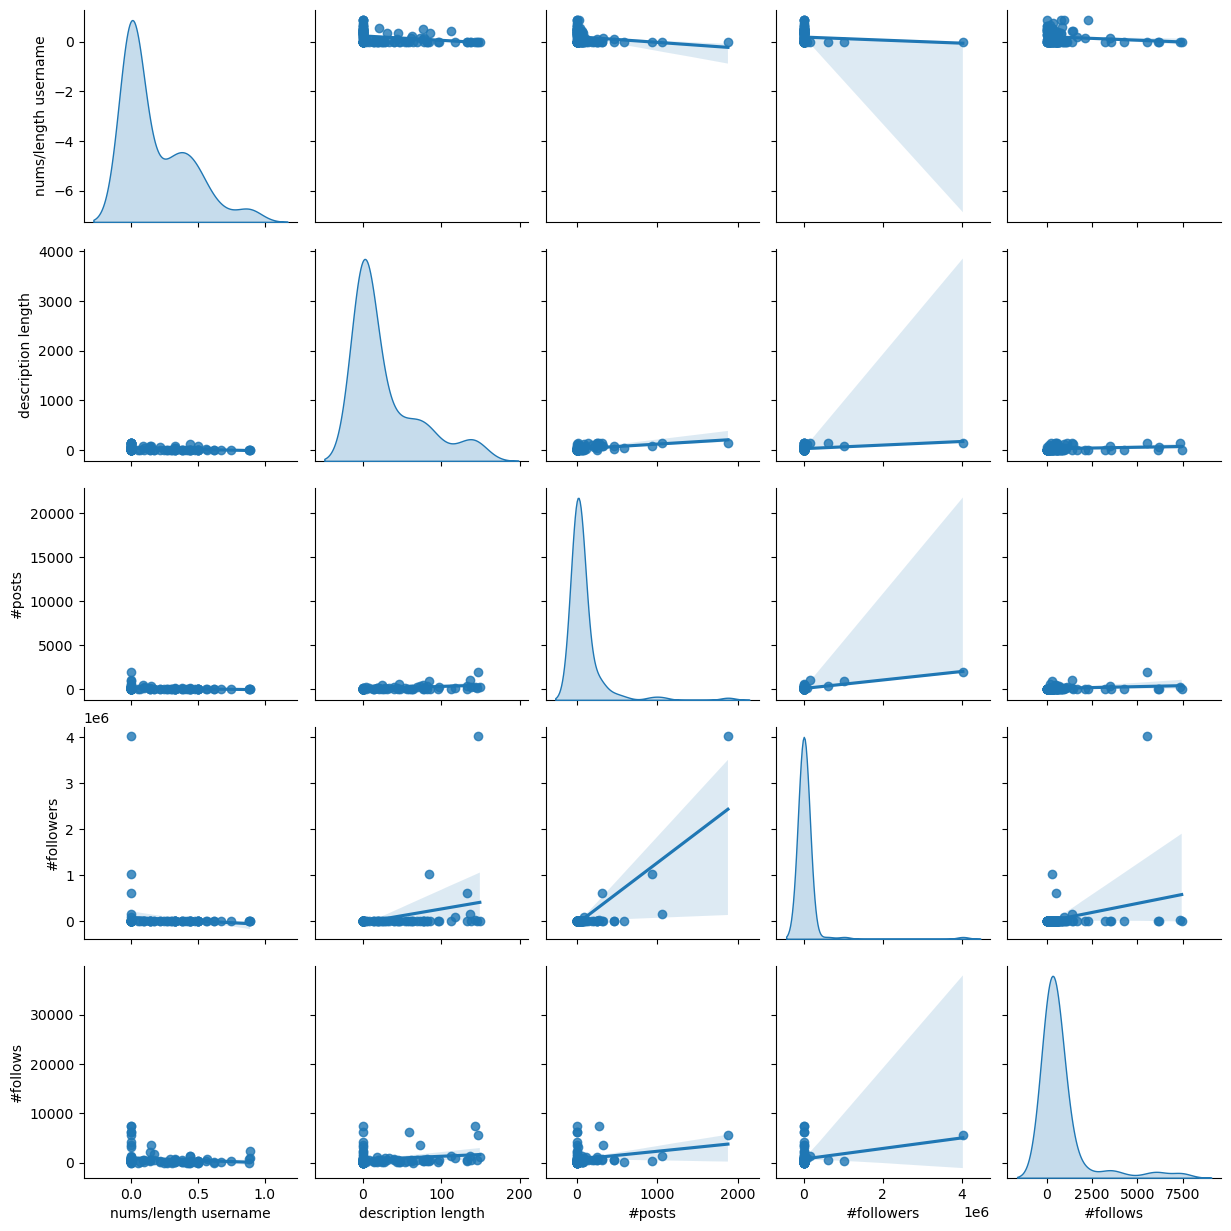

In [117]:
sns.pairplot(countinus_test_value, palette='RdBu', kind='reg', diag_kind='kde')

<Axes: >

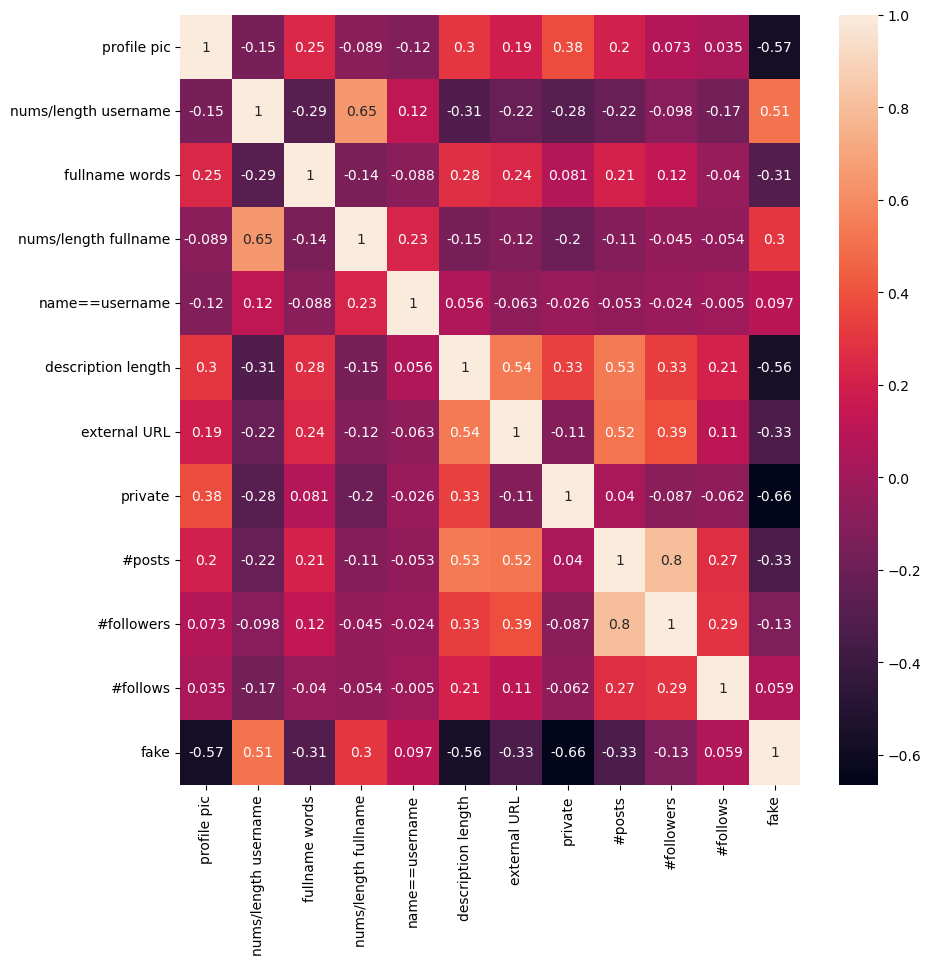

In [118]:
#Correlation heatmap
plt.figure(figsize=(10,10))
cm = test_data.corr()
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

In [119]:
x_train=train_data.drop('fake',axis=1)
x_test=test_data.drop('fake',axis=1)
y_train=train_data['fake']
y_test=test_data['fake']

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
y_train_scaled = y_train.to_numpy()
X_test_scaled = scaler.transform(x_test)

**Mode Creating**

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

**Logistic_Regression**

In [124]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [125]:
# predict & Evaluate on Train Data

ypred_train = log_model.predict(x_train)
print('Train Accuracy:',accuracy_score(y_train,ypred_train))

# cross_validation on Train Data
print('cv score:',cross_val_score(log_model,x_train,y_train,cv=5,scoring='accuracy').mean())

# predict & Evaluate on Test Data 
ypred_test = log_model.predict(x_test)
print('Test Accuracy:',accuracy_score(y_test,ypred_test))

Train Accuracy: 0.9146341463414634
cv score: 0.8989168573607932
Test Accuracy: 0.9067796610169492


In [126]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,ypred_test))

from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

[[52  8]
 [ 3 55]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.87      0.95      0.91        58

    accuracy                           0.91       118
   macro avg       0.91      0.91      0.91       118
weighted avg       0.91      0.91      0.91       118



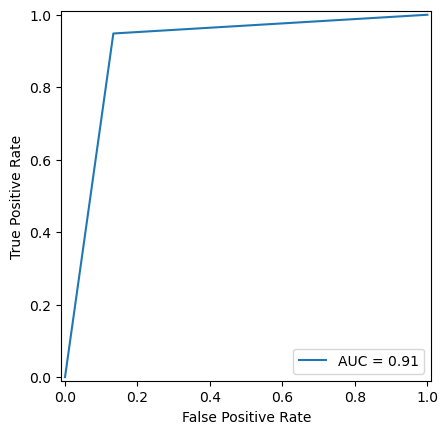

In [127]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr, thresholds = roc_curve(y_test,ypred_test)
roc_auc=auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [128]:
# AUC score
from sklearn.metrics import roc_auc_score
print('AUC score:',roc_auc_score(y_test,ypred_test))

AUC score: 0.9074712643678161


**KNN_Algorithem**

In [130]:
# hyperparameter Tuning
estimator=KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1,50)),'p':[1,2]}
knn_grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
knn_grid.fit(x_train,y_train)

knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=10, p=1)

In [131]:
# modelling 
knn_model=knn_grid.best_estimator_
knn_model.fit(x_train,y_train)

# predict on Train data 
ypred_train = knn_model.predict(x_train)
print('Train Accuracy:',accuracy_score(y_train,ypred_train))

# cross validation score
print('cv score:',cross_val_score(knn_model,x_train,y_train,cv=5,scoring='accuracy').mean())

# predict Test data
ypred_test=knn_model.predict(x_test)
print('Test Accuracy:',accuracy_score(y_test,ypred_test))
print("This Model Is OverFitting Problem")

Train Accuracy: 0.9181184668989547
cv score: 0.9075667429443174
Test Accuracy: 0.847457627118644
This Model Is OverFitting Problem


**SVM_Algorithem**

In [133]:
# hyperparameter tuning
#from sklearn.svm import SVC
#estimator= SVC()
#param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf','sigmoid','poly']}
#svm_grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
#svm_grid.fit(x_train,y_train)

#svm_grid.best_estimator_

In [134]:
# modelling 
#svm_model = svm_grid.best_estimator_
#svm_model.fit(x_train,y_train)

# predict & Evaluate on Train Data
#ypred_train = svm_model.predict(x_train)
#print("train Accuracy :",accuracy_score(y_train,ypred_train))

# cross validation on Train Data
#print("CV Score :",cross_val_score(svm_model,x_train,y_train,cv=5,scoring='accuracy').mean())

# predict & evaluation on test data
#ypred_test = svm_model.predict(x_test)
#print("test Accuracy :",accuracy_score(y_test,ypred_test))

**Decision Tree Classifier**

In [136]:
model= DecisionTreeClassifier(random_state=True)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=True)

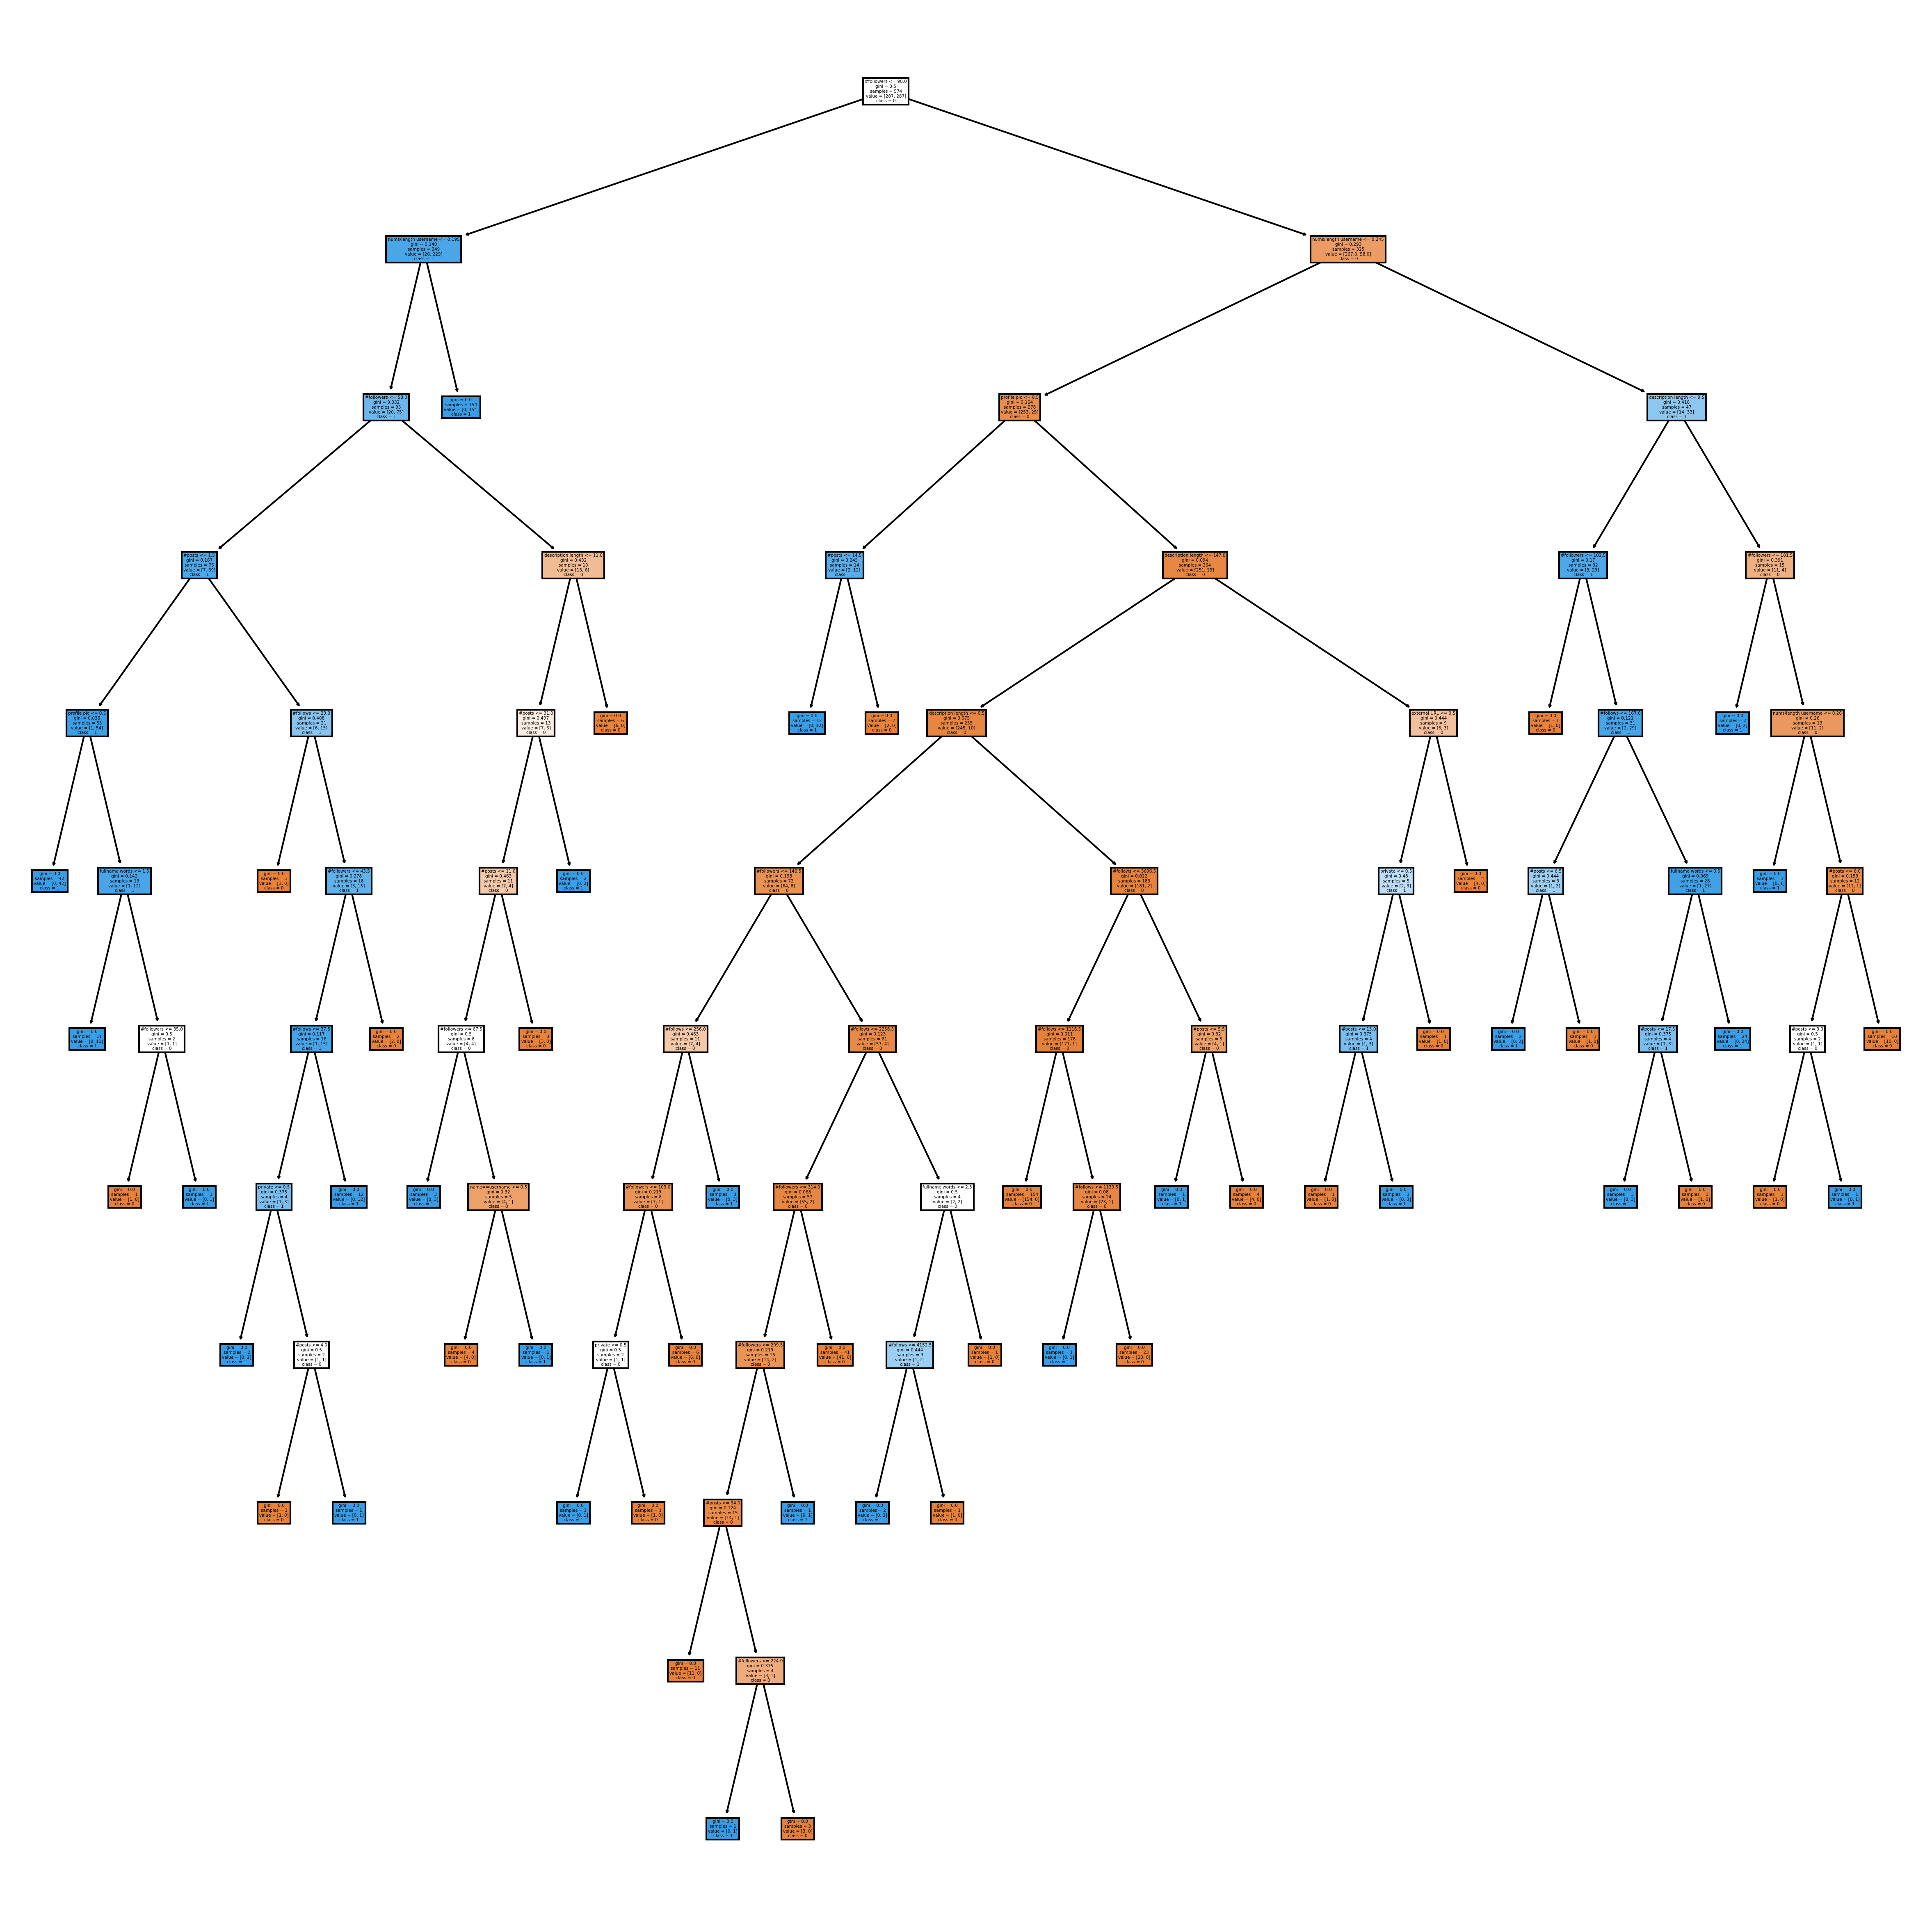

In [137]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20),dpi=300)
plot_tree(model,filled=True,feature_names=x_train.columns.tolist(),class_names=['0','1'])
plt.show()

In [138]:
# hyper parameter tuning
estimator = DecisionTreeClassifier(random_state=True)

param_grid = {'criterion':['gini','entropy'], "max_depth":list(range(1,16))}

dt_grid = GridSearchCV(estimator,param_grid, scoring='accuracy',cv=5)
dt_grid.fit(x_train,y_train)

dt = dt_grid.best_estimator_
dt

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=True)

In [139]:
# we find the important columns by using important features

feats_ab = pd.DataFrame(data=dt.feature_importances_,index=x_train.columns,columns=['importance'])

important_features_dt = feats_ab[feats_ab['importance']>0].index.tolist()
important_features_dt

['profile pic',
 'nums/length username',
 'description length',
 '#posts',
 '#followers']

In [140]:
x_train_dt= x_train[important_features_dt]
x_test_dt = x_test[important_features_dt]


dt = dt_grid.best_estimator_
dt.fit(x_train_dt,y_train)


ypred_train = dt.predict(x_train_dt)
ypred_test = dt.predict(x_test_dt)

print("Train Accuracy:",accuracy_score(y_train,ypred_train))
print("cv score:",cross_val_score(dt,x_train,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy:",accuracy_score(y_test,ypred_test))
print("This Model Is OverFitting Problem")

Train Accuracy: 0.9442508710801394
cv score: 0.9250953470633105
Test Accuracy: 0.8813559322033898
This Model Is OverFitting Problem


**Random Forest Classifier**

In [142]:
# hyper parameter tuning
estimator =  RandomForestClassifier(random_state=True)

param_grid = {'n_estimators':list(range(1,51))}

rf_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
rf_grid.fit(x_train,y_train)

rf=rf_grid.best_estimator_
rf

RandomForestClassifier(n_estimators=14, random_state=True)

In [143]:
feats_ab = pd.DataFrame(data=rf.feature_importances_,index=x_train.columns,columns=['importance'])

important_features_rf = feats_ab[feats_ab['importance']>0].index.tolist()
important_features_rf

['profile pic',
 'nums/length username',
 'fullname words',
 'nums/length fullname',
 'name==username',
 'description length',
 'external URL',
 'private',
 '#posts',
 '#followers',
 '#follows']

In [144]:
x_train_rf = x_train[important_features_rf]
x_test_rf = x_test[important_features_rf]

rf = rf_grid.best_estimator_
rf.fit(x_train_rf,y_train)

ypred_train = rf.predict(x_train_rf)
ypred_test = rf.predict(x_test_rf)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))
print("This Model Is OverFitting Problem")

Train Accuracy : 0.9947735191637631
CV Score : 0.9320213577421816
Test Accuracy : 0.923728813559322
This Model Is OverFitting Problem


**AdaBoost Classifier**

In [146]:
estimator = AdaBoostClassifier(random_state = True)
param_grid = {'n_estimators':list(range(1,100))}

ab_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
ab_grid.fit(x_train,y_train)

ab = ab_grid.best_estimator_
ab

AdaBoostClassifier(n_estimators=48, random_state=True)

In [147]:
feats_ab = pd.DataFrame(data=ab.feature_importances_,index=x_train.columns,columns=['importance'])

important_features_ab = feats_ab[feats_ab['importance']>0].index.tolist()
important_features_ab

['profile pic',
 'nums/length username',
 'fullname words',
 'name==username',
 'description length',
 'external URL',
 'private',
 '#posts',
 '#followers',
 '#follows']

In [148]:
x_train_ab = x_train[important_features_ab]
x_test_ab = x_test[important_features_ab]

# modelling
ab = ab_grid.best_estimator_
ab.fit(x_train_ab,y_train)

# Evaluation
ypred_Train = ab.predict(x_train_ab)
ypred_test = ab.predict(x_test_ab)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(ab,x_train_ab,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))
print("This Model Is OverFitting Problem")

Train Accuracy : 0.9947735191637631
CV Score : 0.9198169336384439
Test Accuracy : 0.9322033898305084
This Model Is OverFitting Problem


**Gradient Boost Classifier**

In [150]:
estimator = GradientBoostingClassifier(random_state = True)
param_grid = {'n_estimators':list(range(1,10)),
              'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

gb_grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
gb_grid.fit(x_train,y_train)

gb = gb_grid.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.5, n_estimators=8, random_state=True)

In [151]:
feats_gb = pd.DataFrame(data=gb.feature_importances_,index=x_train.columns,columns=['importance'])

important_features_gb = feats_gb[feats_gb['importance']>0].index.tolist()
important_features_gb

['profile pic',
 'nums/length username',
 'fullname words',
 'description length',
 'private',
 '#posts',
 '#followers',
 '#follows']

In [152]:
x_train_gb = x_train[important_features_gb]
x_test_gb = x_test[important_features_gb]

# modelling
gb = gb_grid.best_estimator_
gb.fit(x_train_gb,y_train)

# Evaluation
ypred_Train = gb.predict(x_train_gb)
ypred_test = gb.predict(x_test_gb)

print("Train Accuracy :",accuracy_score(y_train,ypred_train))
print("CV Score :",cross_val_score(ab,x_train_gb,y_train,cv=5,scoring='accuracy').mean())
print("Test Accuracy :",accuracy_score(y_test,ypred_test))
print("This Model Is OverFitting Problem")

Train Accuracy : 0.9947735191637631
CV Score : 0.916323417238749
Test Accuracy : 0.8983050847457628
This Model Is OverFitting Problem


**XGBoost Classifier**

In [154]:
estimator = XGBClassifier()
param_grid = {"n_estimators":[10,20,40,100],
             "max_depth":[3,4,5],
             "gamma":[0,0.15,0.3,0.5,1]}

xgb_grid = GridSearchCV(estimator,param_grid, scoring="accuracy",cv=5)
xgb_grid.fit(x_train, y_train)

xgb = xgb_grid.best_estimator_
xgb


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [155]:
feats_xgb = pd.DataFrame(data=xgb.feature_importances_,
                        index=x_train.columns,
                        columns = ["Importance"])

importance_features_xgb = feats_xgb[feats_xgb['Importance']>0].index.tolist()
importance_features_xgb

['profile pic',
 'nums/length username',
 'fullname words',
 'description length',
 'external URL',
 'private',
 '#posts',
 '#followers',
 '#follows']

In [156]:
x_train_xgb = x_train[importance_features_xgb]
x_test_xgb = x_test[importance_features_xgb]


xgb = xgb_grid.best_estimator_
xgb.fit(x_train_xgb , y_train)


ypred_train = xgb.predict(x_train_xgb)
ypred_test = xgb.predict(x_test_xgb)

print("train Accuracy :",accuracy_score(y_train,ypred_train))
print("cv score :",cross_val_score(xgb,x_train_xgb,y_train,cv=5,scoring='accuracy').mean())
print("test Accuracy :",accuracy_score(y_test,ypred_test))
print("This Model Is OverFitting Problem")

train Accuracy : 0.9982578397212544
cv score : 0.930282227307399
test Accuracy : 0.923728813559322
This Model Is OverFitting Problem


((574, 11), (118, 11), (574,), (118,))

In [248]:
#Scaling the data before training the model (Normalize the data)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

In [250]:
Y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
Y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [252]:
#Having a look at the shapes after scaling the data
X_train.shape,X_test.shape

((574, 11), (118, 11))

In [254]:
Y_train.shape,Y_test.shape

((574, 2), (118, 2))

In [256]:
#Percentage of Traininf data
Training_data_percentage = len(X_train)/(len(X_train) + len(X_test) ) * 100
Training_data_percentage

82.94797687861272

In [258]:

Testing_data_percentage = len(X_test)/(len(X_train) + len(X_test) ) * 100
Testing_data_percentage


17.052023121387283

In [260]:
from keras.models import Sequential
ann = Sequential()

In [264]:
from keras.layers import Dense 
from tensorflow.keras.layers import Dense, Dropout
ann.add(Dense(50,input_dim = 11, activation = "relu")) #Initial Layer
ann.add(Dropout(0.3))
ann.add(Dense(150, activation = "relu"))
ann.add(Dropout(0.3))
ann.add(Dense(25, activation = "relu"))
ann.add(Dropout(0.3))
ann.add(Dense(2, activation = "softmax")) #output layer

ann.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 50)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 150)                 │           7,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 25)                  │           3,775 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 2)                   │              52 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,627 (57.14 KB)

 Trainable params: 14,627 (57.14 KB)

 Non-trainable params: 0 (0.00 B)

**Compilling the ANN**

In [266]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [268]:
epochs_hist = ann.fit(X_train, Y_train, epochs = 20, verbose = 1, validation_split = 0.1)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5541 - loss: 0.6841 - val_accuracy: 0.7069 - val_loss: 0.6038
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8060 - loss: 0.5663 - val_accuracy: 0.8621 - val_loss: 0.3878
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8695 - loss: 0.3847 - val_accuracy: 0.8448 - val_loss: 0.2887
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9053 - loss: 0.2832 - val_accuracy: 0.8793 - val_loss: 0.2732
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8821 - loss: 0.2753 - val_accuracy: 0.8793 - val_loss: 0.2435
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9263 - loss: 0.2665 - val_accuracy: 0.8966 - val_loss: 0.1887
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9063 - loss: 0.2449 - val_accuracy: 0.8621 - val_loss: 0.2163
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8899 - loss: 0.3121 - val_accuracy: 0.8793 - val_loss

In [272]:
print(epochs_hist.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [196]:
y_pred = ann.predict(x_test)
y_pred = (y_pred>0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [198]:
from sklearn.metrics import confusion_matrix, accuracy_score

print("Test Accuracy:",accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)


Test Accuracy: 0.8728813559322034


array([[56,  4],
       [11, 47]], dtype=int64)

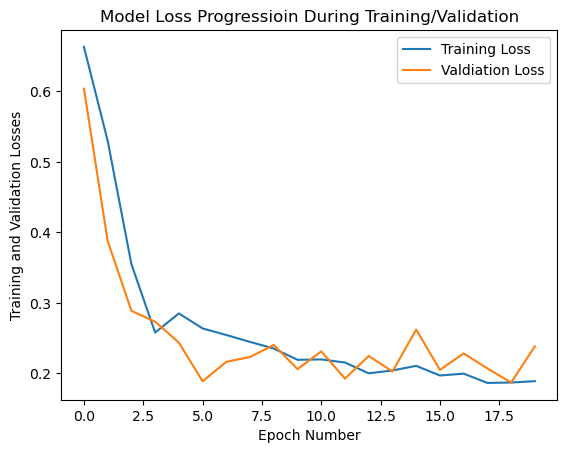

In [274]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progressioin During Training/Validation')
plt.xlabel('Epoch Number')
plt.ylabel('Training and Validation Losses')
plt.legend(['Training Loss','Valdiation Loss'])

In [276]:
predicted = ann.predict(X_test)
predicted

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[4.0621840e-04, 9.9959379e-01],
       [9.9709272e-01, 2.9072673e-03],
       [9.9362272e-01, 6.3772765e-03],
       [9.9858898e-01, 1.4110007e-03],
       [1.3470684e-01, 8.6529315e-01],
       [9.0577775e-01, 9.4222270e-02],
       [9.4812959e-01, 5.1870383e-02],
       [9.7056705e-01, 2.9432971e-02],
       [9.6645218e-01, 3.3547796e-02],
       [9.4086909e-01, 5.9130907e-02],
       [9.3106234e-01, 6.8937719e-02],
       [9.9946326e-01, 5.3676299e-04],
       [9.3615210e-01, 6.3847862e-02],
       [8.4211093e-01, 1.5788911e-01],
       [8.7196356e-01, 1.2803641e-01],
       [9.7625494e-01, 2.3745058e-02],
       [8.4527493e-01, 1.5472509e-01],
       [9.8053235e-01, 1.9467704e-02],
       [9.9949908e-01, 5.0091039e-04],
       [9.9206662e-01, 7.9333615e-03],
       [1.1445678e-02, 9.8855430e-01],
       [8.7918425e-01, 1.2081577e-01],
       [9.1534281e-01, 8.4657237e-02],
       [9.7699034e-01, 2.3009703e-02],
       [9.6734458e-01, 3.2655399e-02],
       [9.2294031e-01, 7.

In [280]:
predicted_value = []
test = []
for i in predicted:
    predicted_value.append(np.argmax(i))

for i in Y_test:
    test.append(np.argmax(i))

In [282]:
print(classification_report(test, predicted_value))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        60
           1       0.93      0.86      0.89        58

    accuracy                           0.90       118
   macro avg       0.90      0.90      0.90       118
weighted avg       0.90      0.90      0.90       118



<Axes: >

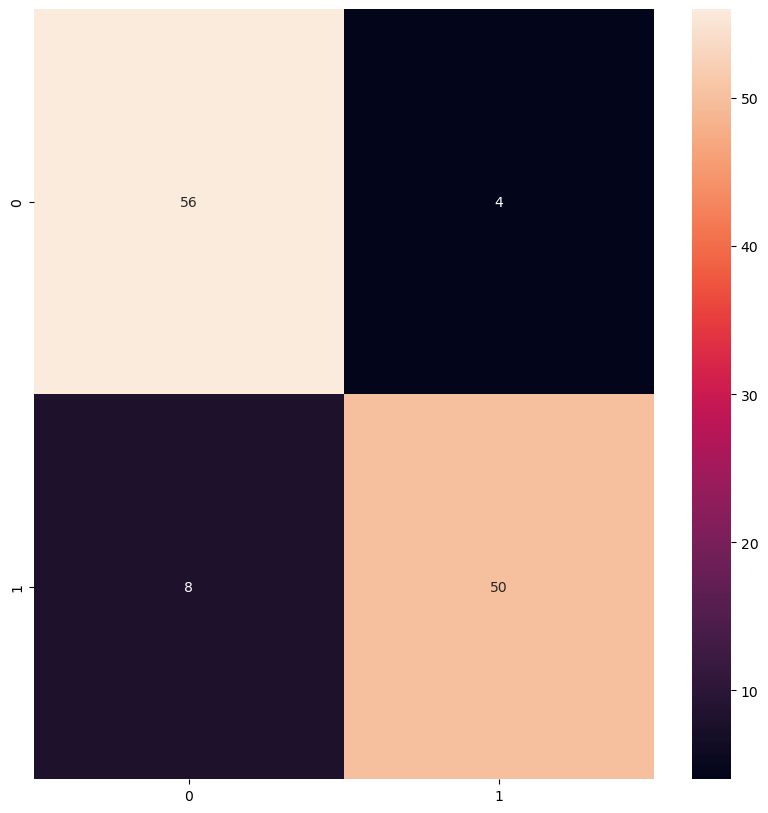

In [284]:
plt.figure(figsize=(10, 10))
con_matrix = confusion_matrix(test,predicted_value)
sns.heatmap(con_matrix, annot=True)

**I Found All Above Algorithem Analysis TO The Best Algorithem is The ANN Algorithem** 

**Best Algorithem Save In Joblib File**

In [ ]:
joblib.dump(log_model, 'best_model.pkl')

**Load The Joblib File**

In [ ]:
loaded_model = joblib.load('best_model.pkl')

In [ ]:
loaded_model.predict(x_test)

**The model predicted true values for 106 accounts and predicted false values for 14 accounts out of 120 accounts.
 For Using ANN Algorithem 95 Parcent of Accuracy We Got.**